In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
companies = pd.read_csv('1000_companies.csv')
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [28]:
X = companies.drop('Profit', axis=1)
y = companies['Profit']

<Axes: >

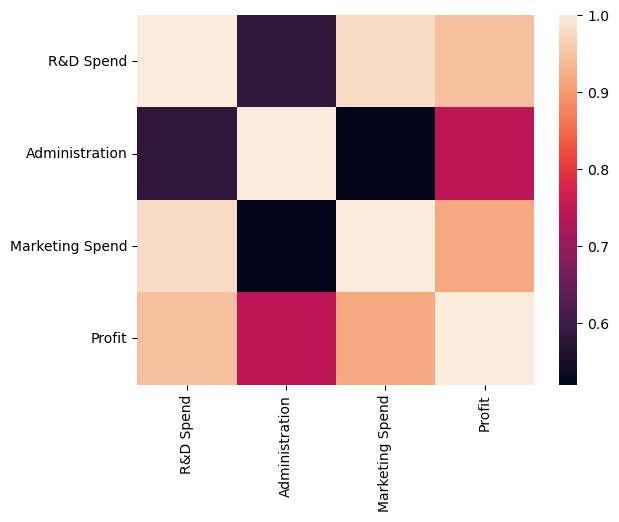

In [29]:
#sns.heatmap(companies.corr(numeric_only=True))
sns.heatmap(companies.corr(numeric_only=True))

In [30]:
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.800,471784.1000,New York
1,162597.70,151377.590,443898.5300,California
2,153441.51,101145.550,407934.5400,Florida
3,144372.41,118671.850,383199.6200,New York
4,142107.34,91391.770,366168.4200,Florida
...,...,...,...,...
995,54135.00,118451.999,173232.6695,California
996,134970.00,130390.080,329204.0228,California
997,100275.47,241926.310,227142.8200,California
998,128456.23,321652.140,281692.3200,California


In [31]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
LabelEncoder = LabelEncoder()
X['State'] = LabelEncoder.fit_transform(X['State'])

# Onehotencoder = OneHotEncoder(categorical_features = [3]) # 
# X = Onehotencoder.fit_transform(X)



In [32]:
#X = X[:, 1:]
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.800,471784.1000,2
1,162597.70,151377.590,443898.5300,0
2,153441.51,101145.550,407934.5400,1
3,144372.41,118671.850,383199.6200,2
4,142107.34,91391.770,366168.4200,1
...,...,...,...,...
995,54135.00,118451.999,173232.6695,0
996,134970.00,130390.080,329204.0228,0
997,100275.47,241926.310,227142.8200,0
998,128456.23,321652.140,281692.3200,0


In [33]:
from sklearn.model_selection import train_test_split

#X_train, X_test , y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred = regressor.predict(X_test)
y_pred

array([ 89624.88499983,  88261.44060358,  94728.57723845, 176034.49990954,
        83234.84214495, 110393.04058199, 131831.18880607,  91307.52461765,
       164414.26754671,  53585.35570743,  66786.11950078, 150921.89704628,
       126746.78121459,  59174.341725  , 177341.80724482,  75139.98127599,
       118605.9491146 , 164403.24374731, 171336.34862472, 181885.06087421,
       118762.26624783,  85504.5201526 , 181345.84072646,  83979.76201107,
       104839.00200137, 101067.00608604,  53722.31401539,  56706.45386115,
        68732.18107141, 209811.34272095, 121136.34391499, 111557.54775873,
       101309.70393418, 138315.39958078,  63806.10546728, 108690.79660343,
       185830.38310114, 171796.58186122, 174997.97325294, 118029.33822338,
        96553.52264734, 165281.03076793, 107557.31012676,  50557.29080259,
       116871.82636073,  58469.02312669, 158771.35516035,  78902.17488961,
       160082.45834529, 131494.74562654, 185233.67354482, 174962.79318566,
        93579.64586335,  

In [36]:
regressor.coef_

array([ 5.27572958e-01,  8.44490415e-01,  1.06639226e-01, -3.54869857e+02])

In [37]:
regressor.intercept_

-51144.726425721834

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9112595959622045